In [1]:
from toroidalFilament_dir.DxDz import cal_newton_DxDz as cal_DxDz
import toroidalFilament_dir.geometry_TT1
from toroidalFilament_dir.geometry_TT1 import coil_angle_dict, R0, R, mu
from toroidalFilament_dir.signal_strength import cal_signal, coil_signal
from process_probe_data import *

import numpy as np
from matplotlib import pyplot as plt

# Realtionship of $\Delta_{||} \sim \Delta_x$ and $\Delta_\perp \sim \Delta_z$

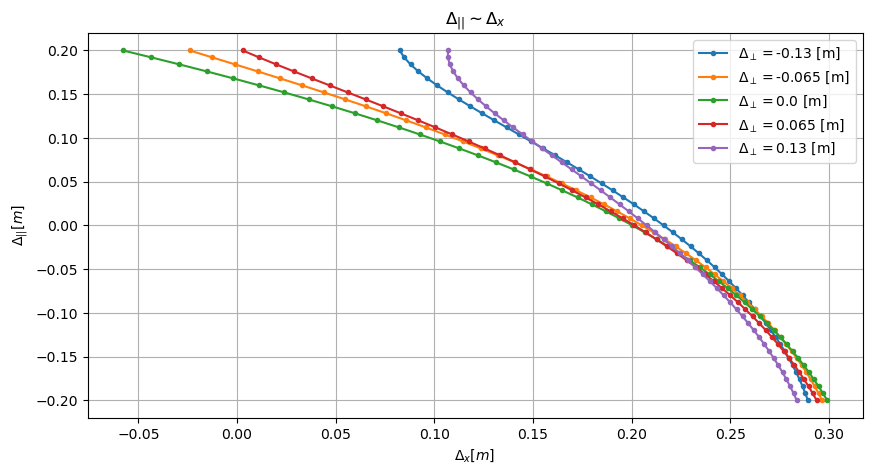

In [4]:
#define plot
fig, ax = plt.subplots(1,figsize = (10,5))

#define shift values
x_lower_lim, x_upper_lim = -0.2,0.2
z_lower_lim, z_upper_lim = -0.13,0.13
x_shift = np.linspace(x_lower_lim,x_upper_lim,51)
z_shift = np.linspace(z_lower_lim,z_upper_lim,5)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[4],coil_angle_dict[7],coil_angle_dict[10]]

#calculate Dx & Dz
for z in z_shift:
    Dx_arr = []
    for x in x_shift:
        signal = cal_signal(x,z,use_probe)
        Dx, _ = cal_DxDz(signal,use_probe)

        Dx_arr.append(Dx)

    ax.plot(Dx_arr, x_shift,".-",label = r"$\Delta_\perp = $" + f"{z} [m]")

ax.set_title(r"$\Delta_{||} \sim \Delta_x$")
ax.set_xlabel(r"$\Delta_x [m]$")
ax.set_ylabel(r"$\Delta_{||} [m]$")
ax.grid()
ax.legend()


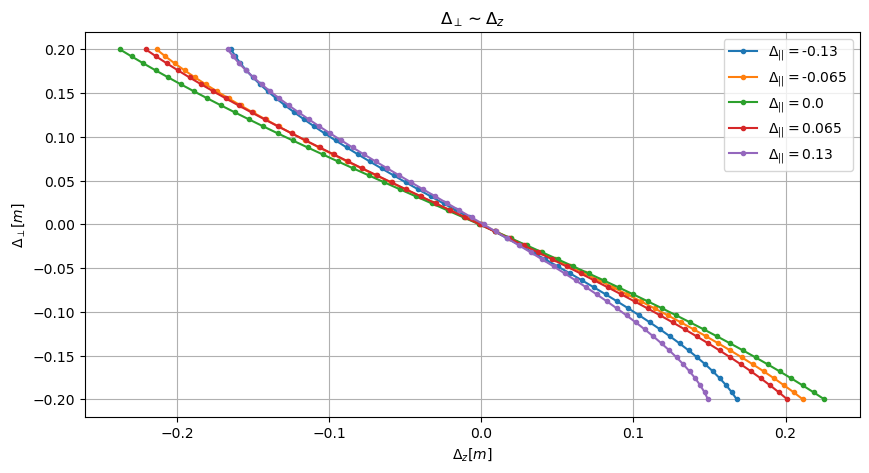

In [5]:
#define plot
fig, ax = plt.subplots(1,figsize = (10,5))

#define shift values
x_lower_lim, x_upper_lim = -0.13,0.13
z_lower_lim, z_upper_lim = -0.2,0.2
x_shift = np.linspace(x_lower_lim,x_upper_lim,5)
z_shift = np.linspace(z_lower_lim,z_upper_lim,51)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[4],coil_angle_dict[7],coil_angle_dict[10]]

#calculate Dx & Dz
for x in x_shift:
    Dz_arr = []
    for z in z_shift:
        signal = cal_signal(x,z,use_probe)
        _, Dz = cal_DxDz(signal,use_probe)

        Dz_arr.append(Dz)

    ax.plot(Dz_arr, z_shift,".-",label = r"$\Delta_{||} = $" + f"{x}")

ax.set_title(r"$\Delta_\perp \sim \Delta_z$")
ax.set_xlabel(r"$\Delta_z [m]$")
ax.set_ylabel(r"$\Delta_\perp [m]$")
ax.grid()
ax.legend()


## Reasons to bound shift value

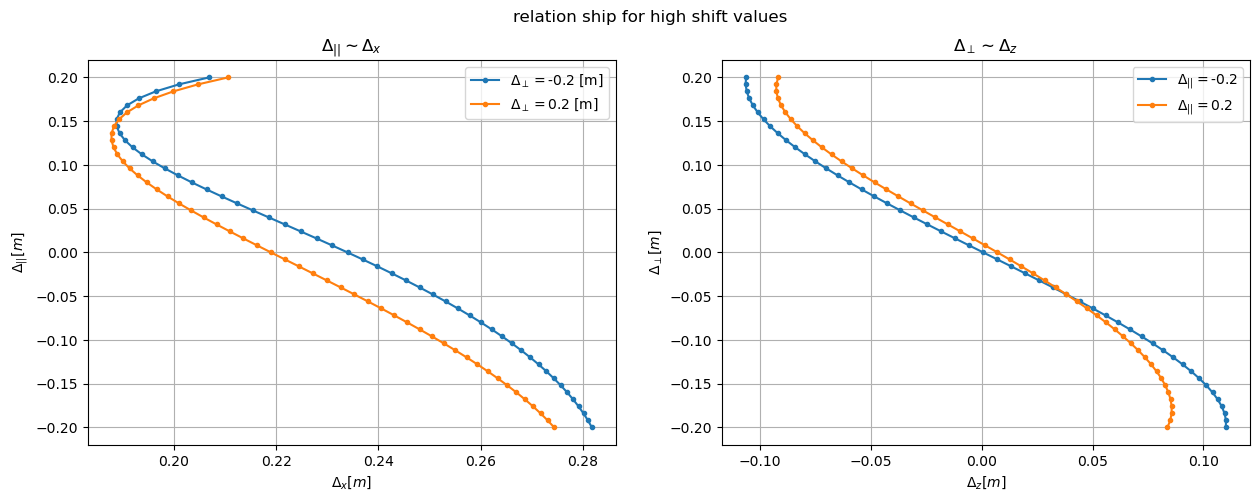

In [6]:
#define plot
fig, ax = plt.subplots(1,2,figsize = (15,5))
fig.suptitle("relation ship for high shift values")

#define shift values
x_lower_lim, x_upper_lim = -0.2,0.2
z_lower_lim, z_upper_lim = -0.2,0.2
x_shift = np.linspace(x_lower_lim,x_upper_lim,51)
z_shift = np.linspace(z_lower_lim,z_upper_lim,2)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[4],coil_angle_dict[7],coil_angle_dict[10]]

#calculate Dx & Dz
for z in z_shift:
    Dx_arr = []
    for x in x_shift:
        signal = cal_signal(x,z,use_probe)
        Dx, _ = cal_DxDz(signal,use_probe)

        Dx_arr.append(Dx)

    ax[0].plot(Dx_arr, x_shift,".-",label = r"$\Delta_\perp = $" + f"{z} [m]")

ax[0].set_title(r"$\Delta_{||} \sim \Delta_x$")
ax[0].set_xlabel(r"$\Delta_x [m]$")
ax[0].set_ylabel(r"$\Delta_{||} [m]$")
ax[0].grid()
ax[0].legend()


#define shift values
x_lower_lim, x_upper_lim = -0.2,0.2
z_lower_lim, z_upper_lim = -0.2,0.2
x_shift = np.linspace(x_lower_lim,x_upper_lim,2)
z_shift = np.linspace(z_lower_lim,z_upper_lim,51)

#define probes to be used
use_probe = [coil_angle_dict[1],coil_angle_dict[4],coil_angle_dict[7],coil_angle_dict[10]]

#calculate Dx & Dz
for x in x_shift:
    Dz_arr = []
    for z in z_shift:
        signal = cal_signal(x,z,use_probe)
        _, Dz = cal_DxDz(signal,use_probe)

        Dz_arr.append(Dz)

    ax[1].plot(Dz_arr, z_shift,".-",label = r"$\Delta_{||} = $" + f"{x}")

ax[1].set_title(r"$\Delta_\perp \sim \Delta_z$")
ax[1].set_xlabel(r"$\Delta_z [m]$")
ax[1].set_ylabel(r"$\Delta_\perp [m]$")
ax[1].grid()
ax[1].legend()


# Signal difference between experiment and simulation

In [4]:
#retreive processed data
shot_no = 966
recorded_plasma_current, recorded_time, discharge_begin, discharge_end = retreive_plasma_current(shot_no)
recorded_magnetic_signal = retreive_magnetic_signal(shot_no)

time, plasma_current, plasma_signal = trim_quantities(recorded_time,recorded_magnetic_signal,recorded_plasma_current,discharge_begin,discharge_end)

In [5]:
num_indices = len(time)

time_ax = plasma_signal[:num_indices].iloc[:,0]

#simulate signal with no shift
simulate_signal = pd.DataFrame(columns = plasma_signal.columns)
for t, Ip in zip(time_ax, plasma_current.to_numpy()):
    signal_lst = []
    for probe_num in range(1,13):
        phi = coil_angle_dict[probe_num]
        r = R0 + R * np.cos(phi)
        z = R * np.sin(phi) - 0
        signal_lst.append(coil_signal(phi,r,z,R0,Ip))

    new_row = [t] + signal_lst
    simulate_signal.loc[len(simulate_signal)] = new_row

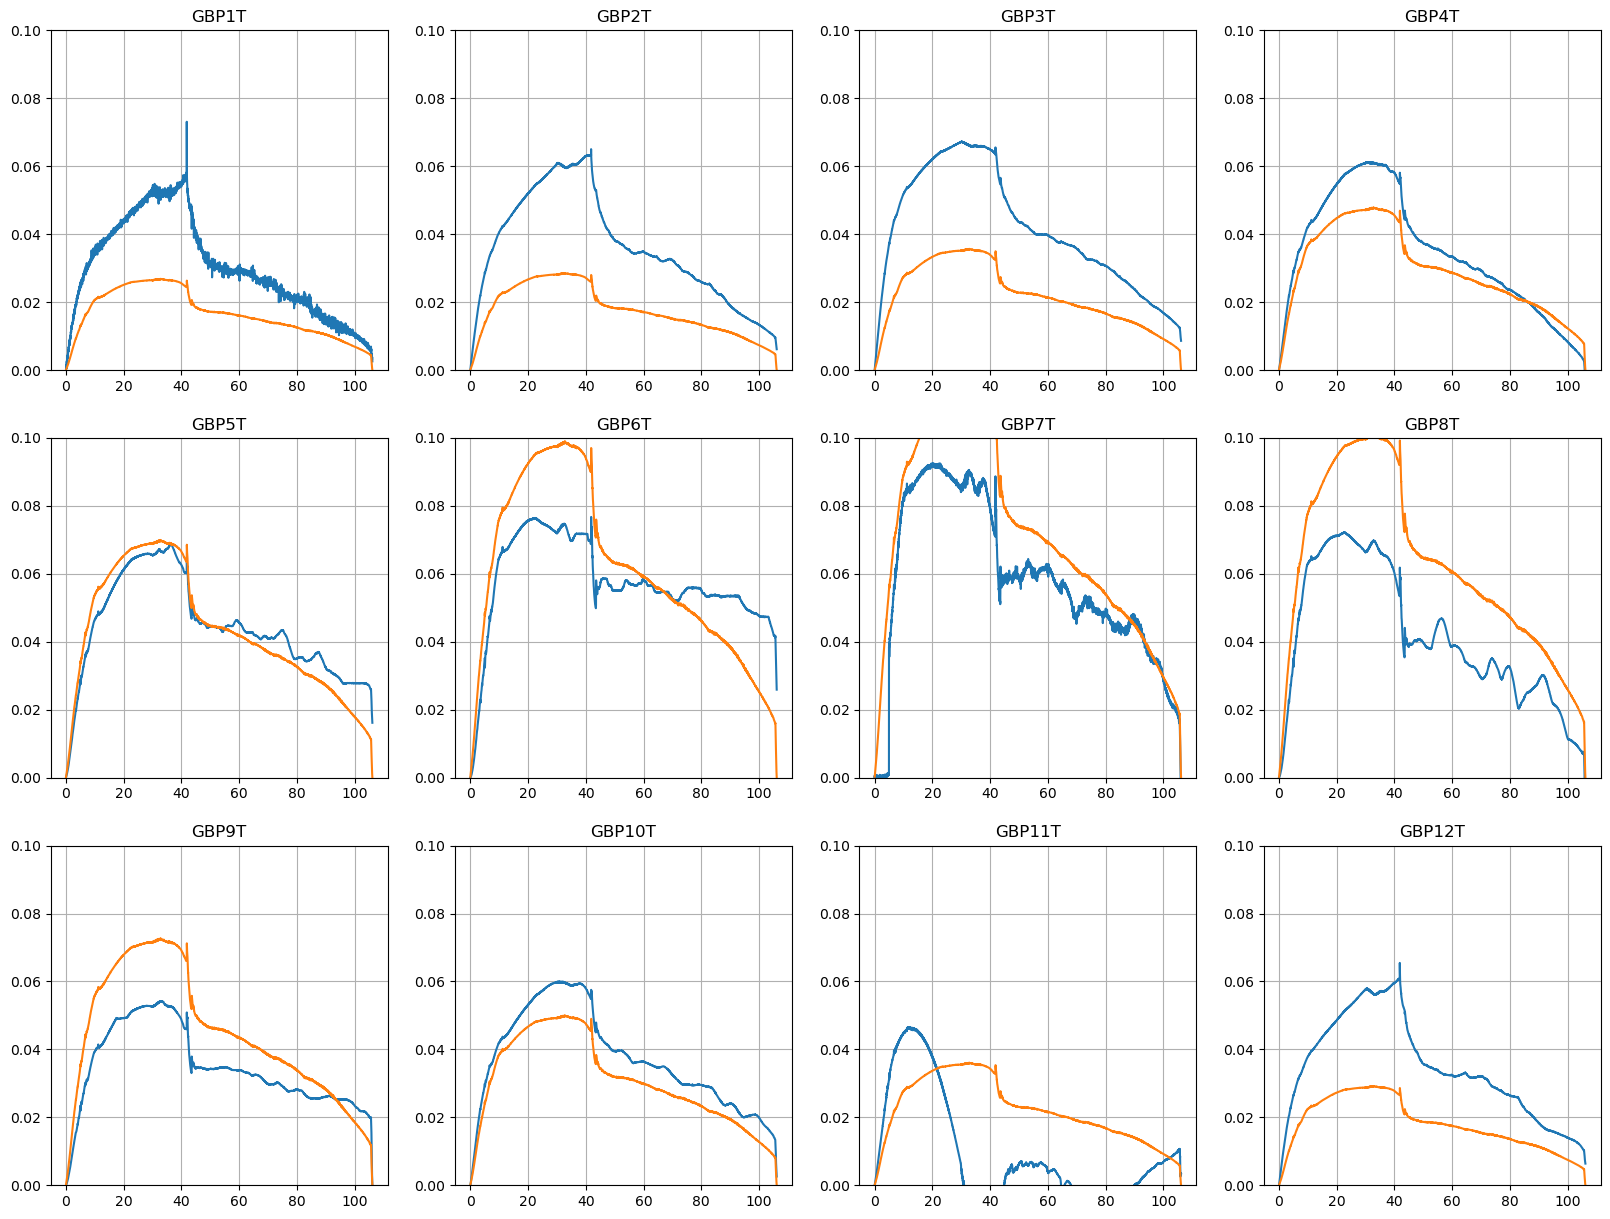

In [6]:
fig, axs = plt.subplots(3,4, figsize = (20,15))

probe_num = 1
for row in range(axs.shape[0]):

    for column in range(axs.shape[1]):
        axs[row,column].plot(time_ax,plasma_signal[:num_indices].iloc[:,probe_num])
        axs[row,column].plot(time_ax,simulate_signal[:num_indices].iloc[:,probe_num])
        axs[row, column].set_title(f"GBP{probe_num}T")
        axs[row,column].grid()
        axs[row,column].set_ylim(0,0.1)

        probe_num += 1

